In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
mutated_genes =  pd.read_csv('Mutated_Genes.txt', sep='\t', header=0)
metadata = pd.read_csv('TCGA.HNSC.metadata.txt', sep='\t', header=0,index_col = [0])

In [3]:
genes = np.array(mutated_genes['Gene'])

In [4]:
mut = pd.read_csv('TCGA.HNSC.mutations.txt', sep='\t', header=0, index_col = [0])
#single nucleotide polymorphisms
mut = mut[mut['Variant_Type'] == 'SNP']
mut = mut[["Hugo_Symbol"]]
mut

,Hugo_Symbol
patient_id,
TCGA-4P-AA8J,PIP4K2A
TCGA-4P-AA8J,NRP1
TCGA-4P-AA8J,PFKFB3
TCGA-4P-AA8J,VCL
TCGA-4P-AA8J,WAPAL
...,...
TCGA-WA-A7H4,TSNARE1
TCGA-WA-A7H4,TOX
TCGA-WA-A7H4,RDH10


In [6]:
# get the count of top 5 gene in each column
mut_gene = pd.pivot_table(mut, index=['patient_id'], columns= "Hugo_Symbol", aggfunc = 'size', fill_value=0)

In [7]:
# merge data
mut_gene = mut_gene[genes]
mut_gene = mut_gene.join(metadata)
mut_gene = mut_gene.drop(columns = ['type','histological_type',
       'histological_grade', 'vital_status', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction'])
mut_gene

KeyError: "['TXNRD3', 'CEP43', 'FHIP1B', 'SLX9', 'PTGR3', 'TEX55', 'ADGRV1', 'C3ORF20', 'CNMD', 'DEPP1', 'ADGRG4', 'B4GAT1', 'TENT4A', 'RTL8B', 'DOP1A', 'SHISAL1', 'ZBED8', 'STEEP1', 'WAPL', 'ANOS1', 'KARS1', 'SPACA9', 'BLTP3B', 'C19ORF54', 'KCNK3', 'RIMOC1', 'WHRN', 'C19ORF44', 'BLTP1', 'NEPRO', 'MINDY4', 'C20ORF85', 'PLPBP', 'SLC49A3', 'MTERF4', 'LINC02903', 'TAFA5', 'NOCT', 'CRPPA', 'AARS1', 'ERICH3', 'ABRAXAS2', 'SEPTIN8', 'IRX2-DT', 'SSPOP', 'C4ORF17', 'SEPTIN6', 'CEP295', 'ACP3', 'CFAP45', 'PWWP3B', 'H2AP', 'ABRAXAS1', 'SPART', 'TOGARAM1', 'C22ORF31', 'DENND10', 'MESD', 'FYB1', 'ACKR1', 'G6PC1', 'PRR23E', 'C3ORF33', 'ITPRID1', 'H3-5', 'GALK1', 'SLC22A20P', 'HEXD', 'CARD17P', 'C2ORF88', 'WASHC4', 'CARD19', 'C22ORF39', 'NEMP1', 'ADGRA2', 'VIRMA', 'TUT4', 'PRXL2A', 'DNAAF9', 'NECTIN3', 'CSKMT', 'C3ORF70', 'MEIOC', 'DIPK1B', 'ADGRL3', 'SGO2', 'C2CD6', 'ADGRL2', 'DRC7', 'C2ORF16', 'TLNRD1', 'TASOR', 'ZNG1F', 'KATNIP', 'TMEM131L', 'MTCL1', 'MINAR1', 'CFAP95', 'C9ORF64', 'EEF1AKMT3', 'SLF1', 'IGF2BP2-AS1', 'STMN3', 'GARS1', 'GBA1', 'ANKRD20A4P', 'NIPSNAP2', 'UGT2A2', 'LIMS1', 'CBLIF', 'CREB1', 'CAVIN1', 'TRARG1', 'LINC01587', 'C20ORF144', 'ADGRG2', 'DUSP15', 'LINC01565', 'STPG3', 'TENT5B', 'C7ORF50', 'C12ORF71', 'FMC1-LUC7L2', 'ECPAS', 'CERT1', 'CARNMT1', 'MATCAP2', 'GARIN3', 'ICE1', 'TNS2', 'PHF24', 'CRYBA1', 'PYM1', 'PGAP4', 'TMEM35A', 'CSNK2B', 'GNG10', 'CSTA', 'H2BW2', 'CCN2', 'C3ORF84', 'IRF1-AS1', 'HYCC2', 'AP3S2', 'MRPS31', 'ARHGAP45', 'H2BC26', 'C8ORF34', 'CGAS', 'BICRAL', 'CFAP47', 'MTREX', 'PATJ', 'ADGRA1', 'POGLUT3', 'PABIR1', 'MAP3K21', 'LEPROTL1', 'LHFPL6', 'GARIN1A', 'C7ORF33', 'FLACC1', 'NAXE', 'HACD2', 'CMKLR2', 'EP400P1', 'ECRG4', 'TOGARAM2', 'ERICH6', 'CEMIP2', 'C3ORF38', 'IRAG1', 'VPS26C', 'DNAAF11', 'RXYLT1', 'MARCHF6', 'RIGI', 'DNAAF10', 'DARS1', 'LDAH', 'CFAP221', 'GUCY1B1', 'GUCY1A1', 'GON7', 'SANBR', 'CDIN1', 'TEX44', 'GSDME', 'ATP5PD', 'CFAP210', 'CFAP157', 'C2ORF73', 'NIBAN1', 'C9ORF24', 'KNL1', 'LINC02877', 'FMC1', 'RTEL1-TNFRSF6B', 'GARIN1B', 'BMT2', 'RACK1', 'SEPTIN1', 'TRIM39-RPP21', 'YAE1', 'VPS35L', 'CCDC185', 'DNASE1', 'C22ORF23', 'ATG101', 'MFSD14B', 'RSRP1', 'C14ORF93', 'HYCC1', 'ADGRE3', 'ZNRD2', 'MARCHF11', 'OPRPN', 'SINHCAF', 'GPAT3', 'GOLGA8DP', 'LY6G6D', 'PLPP7', 'ADGRG6', 'CEMIP', 'STPG4', 'MARCHF3', 'DENND11', 'C1ORF162', 'ADGRA3', 'EXOC3-AS1', 'GATD1', 'HDGFL2', 'C12ORF4', 'TIGAR', 'PLAAT1', 'C3ORF22', 'DYNLT5', 'SQOR', 'PAK5', 'LDAF1', 'CRACR2A', 'PRUNE1', 'KMT5C', 'DRC3', 'PRELID3A', 'CRACDL', 'TSBP1', 'ATP5MG', 'SPATA45', 'C1ORF74', 'P3H4', 'TEX43', 'UTP4', 'AOPEP', 'KAT14', 'C5ORF46', 'SLC49A4', 'C8ORF76', 'OTOS', 'CXORF38', 'BNIP5', 'C18ORF54', 'FYB2', 'GARIN4', 'C1ORF127', 'C6ORF136', 'H2AZ2', 'FCSK', 'ARFGEF3', 'PPP4R3B', 'RIOX2', 'STING1', 'HACD4', 'C1ORF198', 'ADGRG7', 'MIGA2', 'FBH1', 'CIBAR2', 'RAB22A', 'DNAI3', 'C3ORF14', 'H2AC21', 'TLCD3B', 'OGA', 'CCDC9B', 'C14ORF39', 'INSYN1', 'C7ORF57', 'H2AC1', 'SRARP', 'NIBAN3', 'ZNG1B', 'UQCC4', 'LMNTD2', 'GARIN2', 'C19ORF12', 'CBARP', 'LINC02908', 'C9ORF152', 'C11ORF68', 'SELENOO', 'C1ORF94', 'ATP5MGL', 'CENPS', 'ZBED9', 'CFAP92', 'YIF1A', 'KHDC4', 'CIART', 'LINC02914', 'CILK1', 'ADGRL1', 'TLCD4', 'RTL9', 'ATOSA', 'ELAPOR1', 'DISP3', 'CEP162', 'CEP126', 'MARCHF4', 'POLR1G', 'CCDC191', 'INKA1', 'TARS3', 'DNAAF4', 'ADGRF2', 'CALHM4', 'ZUP1', 'PXT1', 'C2ORF80', 'CFAP107', 'DDIAS', 'HACD1', 'ADGRF4', 'LTO1', 'ADGRF5', 'FCMR', 'LARGE1', 'ENTR1', 'MYORG', 'PNMA8B', 'CBY2', 'CRACD', 'TSPOAP1', 'MRTFB', 'RBM4B', 'NSMCE3', 'SEPTIN9', 'NAPRT', 'SPACDR', 'REC114', 'ADGRG1', 'PCNX1', 'CEP131', 'HASPIN', 'ZBED10P', 'KRBOX5', 'SEPTIN12', 'CIP2A', 'PGAP6', 'C1ORF52', 'LRMDA', 'C14ORF119', 'MARCHF1', 'GCN1', 'C17ORF80', 'SHTN1', 'IZUMO1R', 'C11ORF65', 'KRT10-AS1', 'JCAD', 'TRMT9B', 'FAM234B', 'RELCH', 'PLPP4', 'C4ORF50', 'C12ORF76', 'PABIR3', 'CFAP53', 'SAXO2', 'SMIM29', 'ELOA3P', 'C6ORF89', 'IGLON5', 'RIC1', 'CRAMP1', 'MRTFA', 'C11ORF58', 'KYAT3', 'ODAD1', 'TMEM170B', 'DIPK1C', 'FAM169BP', 'DYNC2I1', 'C19ORF47', 'GOLM2', 'ODAD2', 'ADGRD1', 'ARPC4-TTLL3', 'RIPOR3', 'ODAPH', 'FHIP2A', 'MEAK7', 'MROH7-TTC4', 'H2BC18', 'CSTPP1', 'C1ORF116', 'LBHD1', 'MED21', 'ENTREP1', 'FOXL2NB', 'UMODL1-AS1', 'EEF1AKMT1', 'PCNX2', 'C10ORF88', 'ADGRG3', 'CRYBG2', 'FAM234A', 'CCNQ', 'ADGRG5', 'INTS15', 'C9ORF40', 'C7ORF25', 'FNDC11', 'MINDY3', 'PSME3IP1', 'DGLUCY', 'RADX', 'CCDC186', 'NTAQ1', 'C9ORF43', 'POGLUT2', 'C2ORF49', 'LINC02910', 'LINC01559', 'P3H2', 'MACO1', 'PNMA8A', 'C12ORF40', 'KIRREL1', 'PACC1', 'C12ORF56', 'DNAI7', 'CFAP43', 'TRAPPC14', 'INTS14', 'CYRIA', 'RCC1L', 'C1ORF216', 'TMX1', 'PLPPR5', 'TLDC2', 'PRSS45P', 'C1ORF87', 'SCAMP1', 'PRR27', 'GATD3', 'PUDP', 'MACROH2A1', 'FRG1BP', 'NOL4L', 'BABAM2', 'LRATD1', 'RETREG2', 'BBOF1', 'MRM3', 'C3ORF36', 'RHEX', 'LINS1', 'NALF1', 'SLC66A2', 'POU2AF2', 'RESF1', 'CCDC198', 'FAM86C1P', 'BRME1', 'H3-4', 'ABHD18', 'PGGHG', 'C1ORF35', 'LINC01588', 'MTSS2', 'TEDC2', 'NECTIN4', 'C5ORF22', 'ZNF875', 'TWNK', 'C9ORF131', 'HAPSTR1', 'SHFL', 'ERO1A', 'WDCP', 'C11ORF16', 'ZGRF1', 'VNN3P', 'PITX1-AS1', 'PIDD1', 'AZIN2', 'ACP4', 'C21ORF58', 'TAFA3', 'RETREG3', 'LEXM', 'PROSER3', 'ALG1L1P', 'ORMDL2', 'ERO1B', 'CFAP20DC', 'TESMIN', 'MCEMP1', 'C10ORF62', 'SKIC3', 'SUZ12P1', 'DHFR2', 'H2AC14', 'H2AC6', 'MARF1', 'H2AC4', 'CIBAR1', 'H2AC13', 'H2BC6', 'H2BC15', 'H2BC14', 'H2BC4', 'H2BC9', 'MARCHF10', 'H2BC13', 'H2AC20', 'H2BC8', 'H3C6', 'H3C2', 'H3C12', 'H3C4', 'H2BC21', 'H4C8', 'H4C2', 'H4C11', 'H4C3', 'H4C7', 'H4C5', 'ELAPOR2', 'H4C6', 'PRORP', 'H4C12', 'H4C4', 'ZNF812P', 'C4ORF19', 'FAAP100', 'TASL', 'C1ORF21', 'NDEL1', 'PHAF1', 'STYXL2', 'ATOSB', 'AFG1L', 'ANKHD1-EIF4EBP3', 'MTERF2', 'CYBC1', 'ODAD3', 'CRACR2B', 'C21ORF91', 'DCANP1', 'C6ORF15', 'KDF1', 'SGO1', 'TAFA4', 'MICOS10', 'SLC2A4RG', 'RUBCN', 'GARRE1', 'C4ORF45', 'BLTP2', 'NCBP3', 'DCAF1', 'RIPOR2', 'TCAF1', 'SUSD6', 'CAVIN2', 'TSPAN6', 'C22ORF42', 'TMEM94', 'INTS4P1', 'PCLAF', 'GRK2', 'GRK3', 'ADSS2', 'TLE5', 'C22ORF15', 'ZNF724', 'C10ORF55', 'C1ORF105', 'EEIG2', 'TCAF2', 'CPLANE2', 'C6ORF62', 'RPP38-DT', 'CATSPERE', 'TCIM', 'FBXW10B', 'DIPK2A', 'C5ORF24', 'TMEM270', 'KASH5', 'RIPOR1', 'ARMH3', 'DNAAF8', 'DUSP29', 'C16ORF89', 'GPR75-ASB3', 'OBI1', 'BICDL1', 'GDF5-AS1', 'MACROH2A2', 'DELE1', 'NUP58', 'PRAG1', 'PIP4P2', 'CRYBG1', 'IHO1', 'ELP1', 'TOMM70', 'ALPG', 'YARS1', 'WASHC5', 'PLPPR4', 'PRSS42P', 'GFUS', 'EIPR1', 'C14ORF28', 'CBLL2', 'ZNF559-ZNF177', 'PEDS1-UBE2V1', 'GCNA', 'GPR15LG', 'SLC26A10P', 'EEIG1', 'TUT7', 'ICE2', 'C3ORF52', 'SHOC1', 'QTRT2', 'RTL10', 'CARMIL1', 'BMAL2', 'VPS50', 'SLC35E2A', 'EMSY', 'C5ORF15', 'CENATAC', 'PLPP1', 'B3GLCT', 'CD302', 'P2RY14', 'PLPP3', 'COQ8A', 'EFL1', 'ZRSR2P1', 'PPP4R3A', 'ARMT1', 'DOP1B', 'PYCARD-AS1', 'EIF3J', 'UFD1', 'JMJD7-PLA2G4B', 'C15ORF39', 'C2ORF83', 'C6ORF58', 'PCARE', 'C2ORF78', 'C2ORF68', 'C12ORF29', 'C16ORF46', 'WASHC2A', 'PIMREG', 'STIMATE', 'LRRC74A', 'OTULINL', 'SPRING1', 'CPTP', 'NOTCH2NLA', 'FAAP24', 'STKLD1', 'INTS13', 'ZNG1E', 'C1ORF112', 'BMAL1', 'NAXD', 'ARSL', 'PPCS', 'SEPTIN11', 'EZHIP', 'H2AJ', 'GET3', 'CFAP44', 'VARS1', 'MPIG6B', 'IQCN', 'MINDY1', 'WARS1', 'NSD2', 'RPL12', 'ATP5F1A', 'GET1', 'MRPL12', 'SLF2', 'ARMH4', 'ACP7', 'CATIP', 'TEPSIN', 'C3ORF62', 'C1ORF146', 'CD300LD-AS1', 'LARGE2', 'CPLANE1', 'PYCR3', 'C8ORF33', 'ZNF22-AS1', 'OTULIN', 'MARCHF8', 'DEUP1', 'ATP5F1B', 'ATP5F1C', 'C6ORF118', 'PRR30', 'ATP5PB', 'ATP5MC1', 'ATP5MC2', 'ATP5MC3', 'PRKG1-AS1', 'DNAI4', 'ATP5PF', 'LINC02870', 'KIZ', 'H2BC1', 'HEATR9', 'NDUFV1-DT', 'SHLD2', 'CCN4', 'NPS', 'DDIT4', 'ZNG1A', 'CCN5', 'CCN6', 'GRAMD2A', 'H2AC25', 'GPRASP3', 'SPINDOC', 'RNF122', 'MFSD13A', 'CFAP69', 'CENPBD1P', 'LNPK', 'ADGRB1', 'ADGRB2', 'ADGRB3', 'ZPR1', 'JHY', 'BCL2L2', 'SELENOH', 'CFAP141', 'C16ORF78', 'ADSS1', 'CLBA1', 'LLCFC1', 'C5ORF34', 'MARCHF9', 'CFAP90', 'TEX19', 'ATPSCKMT', 'C9ORF153', 'C12ORF50', 'UTP25', 'CFAP77', 'PRSS57', 'CABCOCO1', 'C1ORF174', 'SEPTIN3', 'COQ8B', 'RAB5IF', 'LVRN', 'LINC02909', 'SARS1', 'LMNTD1', 'PCDHB17P', 'C10ORF95', 'PLPPR3', 'H2BC11', 'H1-10', 'CHURC1', 'H2AC11', 'INSYN2A', 'STN1', 'H3C13', 'LHFPL7', 'ETFBKMT', 'BCLAF3', 'ANGPTL8', 'ERBIN', 'INKA2', 'PRKN', 'PBX1', 'MAB21L4', 'C10ORF53', 'MINDY2', 'TMEM132E-DT', 'GARIN5A', 'C17ORF97', 'GLMP', 'LINC02875', 'C1ORF141', 'NCMAP', 'RTL4', 'P3H1', 'ZNF625-ZNF20', 'C6ORF120', 'C1ORF226', 'GPAT4', 'FAM241B', 'RSPH14', 'NEXMIF', 'RTL5', 'GAS8-AS1', 'CFAP410', 'C9ORF163', 'PCSK4', 'LINC01140', 'CFAP46', 'CCDC190', 'SELENOP', 'VSIR', 'ADGRL4', 'MIDEAS', 'CCDC32', 'MFSD4B', 'PDF', 'RBSN', 'C17ORF75', 'PDGFB', 'SKIC2', 'GATB', 'CXORF58', 'DMAC2L', 'AJM1', 'NALF2', 'RPSA2', 'C11ORF52', 'C19ORF18', 'H1-7', 'TENT4B', 'CFAP58', 'CARS1', 'C17ORF67', 'TAMALIN', 'NOPCHAP1', 'PRR35', 'KYAT1', 'PLPPR1', 'BLTP3A', 'SLC66A1', 'C16ORF86', 'ADGRE2', 'CFAP65', 'CFAP299', 'TENT5C', 'LINC02915', 'LINC02694', 'CFAP36', 'RSKR', 'TRBV25-1', 'MYL11', 'PALS1', 'C7ORF31', 'METTL25B', 'CARMIL3', 'ALKAL1', 'ZNF436-AS1', 'LINC03042', 'SSC4D', 'MYPOP', 'CFAP61', 'LRRC75A', 'TBC1D29P', 'ADGRE5', 'TMEM266', 'MATCAP1', 'CARMIL2', 'SEPTIN7', 'C1ORF159', 'MTERF3', 'MTARC2', 'SAXO1', 'COP1', 'POLR1F', 'C17ORF98', 'PRELID3B', 'PITPNA', 'WASHC3', 'MRPL57', 'SEM1', 'TEX47', 'EOLA1', 'CYREN', 'HROB', 'IRAG2', 'TASOR2', 'LY75', 'BPNT2', 'C1ORF109', 'ODR4', 'GARIN6', 'RMC1', 'BCO1', 'C1ORF56', 'EEF2KMT', 'HPF1', 'INTS11', 'C20ORF27', 'PLAAT2', 'C2ORF42', 'CZIB', 'MFSD4A', 'FDX2', 'AGAP7P', 'TKFC', 'BICRA', 'SGF29', 'MRM2', 'NSD3', 'SRPRA', 'PCNX4', 'ITPRID2', 'SEPTIN5', 'SEPTIN4', 'DENND2B', 'CEP83', 'CXORF66', 'C3ORF18', 'MARS1', 'BORCS5', 'GALNT17', 'C10ORF71', 'FAM241A', 'CIAO3', 'KMT5B', 'UTP11', 'CFAP100', 'CFAP70', 'HDHD5', 'KIFBP', 'TMEM121B', 'METTL27', 'TBXT', 'PTPA', 'LINC02904', 'CFAP119', 'MTRES1', 'RNF181', 'MARCHF2', 'PRMT9', 'JPT2', 'MRPL30', 'CFAP91', 'SEPTIN14', 'MELTF', 'TARS1', 'DYNC2I2', 'IFTAP', 'C11ORF24', 'C12ORF60', 'IGLJ2', 'TAFA1', 'ELOA2', 'PIP4P1', 'EMC4', 'DRICH1', 'DOCK8-AS1', 'TENT5D', 'C10ORF82', 'SPEM2', 'FBXL9P', 'PPDPFL', 'TAFAZZIN', 'WASHC2C', 'ELOC', 'ELOA', 'THAP12', 'TCP10L3', 'ADGRF3', 'AFDN', 'DYNLT2', 'H2AC8', 'H1-6', 'H1-5', 'H1-4', 'H1-3', 'H1-2', 'H1-1', 'H3-3B', 'H2BC5', 'H2AZ1', 'H2AX', 'MRE11', 'HARS1', 'ITIH4-AS1', 'C4ORF36', 'GASK1B', 'MFSD14A', 'BMERB1', 'GRAMD2B', 'ANTKMT', 'PEAK3', 'TEX45', 'C1ORF131', 'INTS6L', 'C2ORF76', 'CFAP206', 'HACD3', 'PALM2AKAP2', 'HMOX2', 'GOLGA6L10', 'C10ORF90', 'C11ORF40', 'EOLA2', 'C8ORF58', 'MIGA1', 'RUSF1', 'MTARC1', 'IP6K2', 'GAREM1', 'ILRUN', 'CFAP68', 'PLAAT5', 'PPP5D1P', 'NECTIN1', 'NECTIN2', 'C9ORF72', 'ZNG1C', 'RAB2A', 'QARS1', 'MMUT', 'MVK', 'LARS1', 'MARCHF7', 'TRMO', 'NIBAN2', 'CYRIB', 'C12ORF43', 'PCNX3', 'SMIM43', 'LRATD2', 'TERB2', 'H2BW1', 'CFAP418', 'C11ORF87', 'HOATZ', 'CCDC183-AS1', 'RFLNA', 'IL25', 'RARS1', 'HIKESHI', 'RTF2', 'C4ORF33', 'PLAAT4', 'ADGRE1', 'NARS1', 'IARS1', 'ADGRF1', 'MRPL58', 'EPRS1', 'ARRDC1-AS1', 'SARAF', 'PALS2', 'H4C16', 'C17ORF50', 'ABTB3', 'H1-8', 'PAXBP1-AS1', 'PJVK', 'RTL3', 'CFAP52', 'SEPTIN2', 'EVI2A', 'CCN1', 'C8ORF74', 'ARPIN', 'STK26', 'MAP3K20', 'TAFA2', 'C9ORF50', 'MIR1915HG', 'KICS2', 'SELENOT', 'USF3', 'SNU13', 'C12ORF42', 'C5ORF58', 'C15ORF32', 'CFAP54', 'NME2', 'JCHAIN', 'TENT2', 'ERICH5', 'CCN3', 'FCGR1BP', 'NRDC', 'VXN', 'TMEM268', 'VEGFD', 'LGI3', 'C10ORF120', 'H2BC12', 'DEFB136', 'CCDC184', 'ADA2', 'PPT2-EGFL8', 'KMT5A', 'DELEC1', 'CFAP251', 'TRIM6-TRIM34'] not in index"

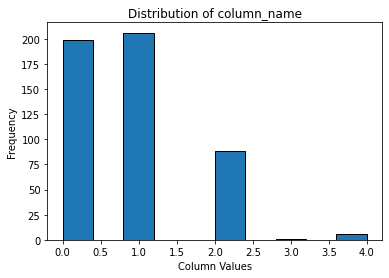

In [8]:
plt.hist(mut_gene['TP53'], bins=10, edgecolor='k') # you can adjust the number of bins
plt.xlabel('Column Values')
plt.ylabel('Frequency')
plt.title('Distribution of column_name')
plt.show()

In [9]:
def quartile_gene(x):
    Q1 = mut_gene[x].quantile(0.25)
    Q3 = mut_gene[x].quantile(0.75)
    mut_gene[x] = mut_gene[x].apply(lambda x: 0 if x <= Q1 else 1 if x > Q3 else np.nan)


In [10]:
# find quantile for genes and convert q1 as 0 and q4 as 1
for i in genes:
    quartile_gene(i)
mut_gene

KeyError: 'TXNRD3'

In [212]:
# preprocessing for other convariates
gene = mut_gene.copy()
#drop race which is not available or unknown or not evaluated
gene = gene[gene['race'] != '[Not Available]']
gene = gene[gene['race'] != '[Unknown]']
gene = gene[gene['race'] != '[Not Evaluated]']
gene = gene[gene['ajcc_pathologic_tumor_stage'] != '[Discrepancy]']
gene = gene[gene['ajcc_pathologic_tumor_stage'] != '[Not Available]']
gene['gender'] = gene['gender'].map({'MALE': 1, 'FEMALE': 0})
gene['tumor_status'] = gene['tumor_status'].map({'TUMOR FREE': 1, 'WITH TUMOR': 0})
#meta = pd.get_dummies(meta, columns=['race'], prefix='race')
#meta = pd.get_dummies(meta, columns=['ajcc_pathologic_tumor_stage'], prefix='ajcc_pathologic_tumor_stage')

In [213]:
gene

,TP53,TTN,FAT1,MUC16,CSMD3,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,tumor_status,OS,OS.time,DSS,DSS.time
patient_id,,,,,,,,,,,,,,
TCGA-4P-AA8J,1.0,0.0,0,0,0,66.0,1,BLACK OR AFRICAN AMERICAN,Stage IVA,1.0,0.0,102.0,0.0,102.0
TCGA-BA-4074,NaN,0.0,0,1,1,69.0,1,WHITE,Stage IVA,0.0,1.0,462.0,1.0,462.0
TCGA-BA-4075,NaN,0.0,0,0,0,49.0,1,BLACK OR AFRICAN AMERICAN,Stage III,0.0,1.0,283.0,1.0,283.0
TCGA-BA-4077,0.0,NaN,0,0,0,45.0,0,WHITE,Stage IVA,0.0,1.0,1134.0,1.0,1134.0
TCGA-BA-5149,0.0,0.0,0,0,0,47.0,1,WHITE,Stage IVA,0.0,1.0,806.0,1.0,806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JO,1.0,NaN,1,1,0,79.0,0,WHITE,Stage IVA,0.0,1.0,631.0,1.0,631.0
TCGA-UF-A7JS,1.0,NaN,0,0,0,59.0,1,WHITE,Stage IVA,0.0,1.0,680.0,1.0,680.0
TCGA-UF-A7JT,NaN,NaN,0,0,0,72.0,0,WHITE,Stage IVA,0.0,1.0,993.0,1.0,993.0


In [ ]:
# End of propocessing

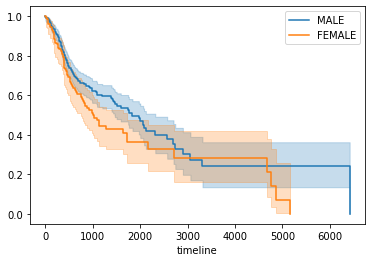

In [87]:
# Define the KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Example groups could be based on gene mutation status or any other categorical variable
for group in metadata['gender'].unique():
    # Select data for the group
    df_group = metadata[metadata['gender'] == group]
    
    # Fit the model to the data
    kmf.fit(df_group['OS.time'], df_group['OS'], label=group)
    
    # Plot the survival function
    kmf.plot_survival_function()

In [112]:
pd.unique(meta['tumor_status'])

array([1, 0])

In [114]:
def coxfitter(data, duration, event):
    # Define the CoxPHFitter object
    cph = CoxPHFitter()
    # Fit the model to your data
    cph.fit(data, duration_col= duration, event_col=event)

    # Print the summary
    print(cph.print_summary())

In [115]:
coxfitter(meta_os[['tumor_status','OS.time', 'OS']], 'OS.time', 'OS')

<lifelines.CoxPHFitter: fitted with 393 total observations, 235 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 393
number of events observed = 158
   partial log-likelihood = -757.28
         time fit was run = 2023-05-26 07:10:06 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
tumor_status  -2.05       0.13       0.18            -2.39            -1.70                 0.09                 0.18

               cmp to      z      p   -log2(p)
covariate                                     
tumor_status     0.00 -11.57 <0.005     100.47
---
Concordance = 0.72
Partial AIC = 1516.56
log-likelihood ratio test = 146.71 on 1 df
-log2(p) of ll-ratio test = 109.76

None


<AxesSubplot:xlabel='timeline'>

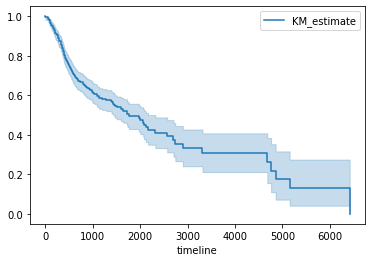

In [30]:
T = meta['OS.time']
E = meta['OS']
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

<AxesSubplot:xlabel='timeline'>

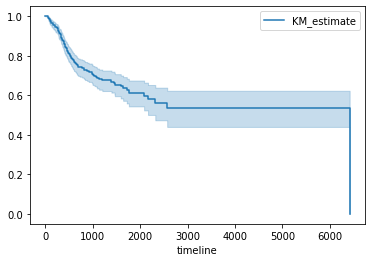

In [29]:
meta = metadata.dropna(subset=['DSS.time','DSS'])
E = meta['DSS']
T = meta['DSS.time']
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

In [11]:
expression = pd.read_csv('TCGA.HNSC.expression.txt', sep='\t', header=0)
expression

,patient_id,sample_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,...,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
0,TCGA-4P-AA8J,TCGA-4P-AA8J-01A-11R-A39I-07,0.0,3.1490,12.8732,122.9390,1429.060,0.0,266.2150,0.0000,...,281.861,695.116,24.6495,150.362,732.091,7.3949,419.042,11611.80,881.220,358.650
1,TCGA-BA-4074,TCGA-BA-4074-01A-01R-1436-07,0.0,12.8563,11.8081,336.1650,1927.680,0.0,39.3089,0.0000,...,2132.460,1193.140,23.8937,172.266,380.372,4.6246,805.062,2516.93,258.591,1088.320
2,TCGA-BA-4075,TCGA-BA-4075-01A-01R-1436-07,0.0,12.3168,3.7626,347.8120,1492.700,0.0,77.7167,0.0000,...,761.002,673.188,20.9031,172.049,562.240,1.6079,487.740,5930.05,292.644,980.303
3,TCGA-BA-4076,TCGA-BA-4076-01A-01R-1436-07,0.0,12.4833,4.3080,278.0170,1205.820,0.0,112.2920,0.5247,...,480.068,1032.660,47.2255,324.282,1440.900,35.1568,722.550,2674.54,672.176,998.557
4,TCGA-BA-4077,TCGA-BA-4077-01B-01R-1436-07,0.0,12.4543,11.6073,321.5450,853.706,0.0,48.1232,0.0000,...,1325.310,1620.310,44.7546,210.780,1423.000,52.9355,770.934,8035.61,763.234,692.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,TCGA-UF-A7JV,TCGA-UF-A7JV-01A-11R-A34R-07,0.0,3.5374,14.1498,139.5330,1099.300,0.0,469.4800,0.0000,...,569.413,992.406,23.0703,234.163,832.837,0.7690,589.445,9484.19,725.175,606.364
541,TCGA-UP-A6WW,TCGA-UP-A6WW-01A-12R-A34R-07,0.0,10.6623,17.2220,107.1630,1371.560,0.0,172.8820,0.6971,...,728.379,2271.170,25.4444,156.849,747.299,332.5200,417.219,5322.41,1110.840,483.095
542,TCGA-WA-A7GZ,TCGA-WA-A7GZ-01A-11R-A34R-07,0.0,45.2095,36.0000,174.1120,626.350,0.0,204.3200,0.8639,...,548.454,1355.940,38.8769,246.652,1380.560,3.4557,549.460,3521.81,1832.830,711.447
543,TCGA-WA-A7GZ,TCGA-WA-A7GZ-11A-11R-A34R-07,0.0,55.5456,56.1361,88.2798,895.379,0.0,298.4600,0.6418,...,266.861,334.403,64.8267,319.641,1287.550,47.4968,2718.870,1535.30,1926.190,605.263


In [12]:
mutated_genes =  pd.read_csv('Mutated_Genes.txt', sep='\t', header=0)
metadata = pd.read_csv('TCGA.HNSC.metadata.txt', sep='\t', header=0,index_col = [0])

In [13]:
mutated_genes = mutated_genes.sort_values(by=['# Mut'],ascending=False)[:100].reset_index(drop = True)
genes = np.array(mutated_genes['Gene'])

In [14]:
genes = np.array(mutated_genes['Gene'])

In [17]:
genes

array(['TP53', 'TTN', 'FAT1', 'MUC16', 'CSMD3', 'SYNE1', 'CDKN2A',
       'LRP1B', 'NOTCH1', 'PIK3CA', 'PCLO', 'KMT2D', 'DNAH5', 'FLG',
       'USH2A', 'NSD1', 'RYR2', 'PLEC', 'COL11A1', 'PKHD1L1', 'CASP8',
       'DMD', 'FAM135B', 'AHNAK', 'FAT3', 'SI', 'XIRP2', 'HUWE1', 'RELN',
       'CUBN', 'PAPPA2', 'MUC17', 'MUC5B', 'PCDH15', 'COL22A1', 'PCDH11X',
       'ZFHX4', 'APOB', 'AHNAK2', 'ADGRV1', 'FAT4', 'MACF1', 'DST',
       'DNAH8', 'DNAH9', 'DNAH11', 'NAV3', 'ABCA13', 'LRP2', 'HERC2',
       'FMN2', 'CSMD1', 'LAMA2', 'SYNE2', 'PKHD1', 'NEB', 'RP1', 'OBSCN',
       'UNC13C', 'RYR3', 'NPAP1', 'HMCN1', 'KMT2C', 'DNAH7', 'TENM1',
       'CDH10', 'PEG3', 'EP300', 'FAT2', 'VPS13B', 'PRDM9', 'ZNF804B',
       'DCHS2', 'ANK2', 'SPTA1', 'CREBBP', 'FBXW7', 'LRRK2', 'THSD7A',
       'ASXL3', 'LRP1', 'MGAM', 'ZNF208', 'HRAS', 'RYR1', 'ADGRB3',
       'MROH2B', 'VCAN', 'TMEM132D', 'CTNND2', 'MDN1', 'RNF213', 'AKAP9',
       'ASPM', 'AJUBA', 'LRRC4C', 'SVEP1', 'BIRC6', 'NRXN1', 'NIPBL'],
      d

In [16]:
import pandas as pd

# Load the gene expression data
gene_expression_data = pd.read_csv('TCGA.HNSC.expression.txt', delimiter='\t')

# Remove everything after '|' in column names
gene_expression_data.columns = gene_expression_data.columns.str.split('|', expand=True).get_level_values(0)
gene_expression_data

# Filter the gene list based on the available columns
selected_genes = [gene for gene in gene_list if gene in gene_expression_data.columns]

# Select the desired genes from the gene expression data
selected_genes_data = gene_expression_data[['patient_id', 'sample_id'] + selected_genes]


In [17]:
selected_genes_data

,patient_id,sample_id,TP53,TTN,FAT1,MUC16,CSMD3,SYNE1,CDKN2A,LRP1B,...,CTNND2,MDN1,RNF213,AKAP9,ASPM,LRRC4C,SVEP1,BIRC6,NRXN1,NIPBL
0,TCGA-4P-AA8J,TCGA-4P-AA8J-01A-11R-A39I-07,822.678,1157.3300,1620.71,1004.4700,1.2325,672.3160,32.0444,8.6273,...,6.1624,258.204,3742.970,619.935,264.982,3.0812,161.2080,921.892,3.6974,1595.44
1,TCGA-BA-4074,TCGA-BA-4074-01A-01R-1436-07,1805.510,103.6870,6415.45,17.3422,0.3854,136.8100,40.8505,1.1561,...,0.3854,372.279,913.740,173.422,672.106,1.9269,97.5016,1124.160,16.9568,1605.89
2,TCGA-BA-4075,TCGA-BA-4075-01A-01R-1436-07,383.760,295.9180,4162.40,1.0720,36.9824,63.2453,307.1150,0.5360,...,0.0000,168.297,629.238,219.751,414.311,1.6079,124.3470,526.866,1.0720,907.41
3,TCGA-BA-4076,TCGA-BA-4076-01A-01R-1436-07,960.777,73.7348,5255.15,9.4451,1.5742,58.7695,2.0989,0.0000,...,0.0000,206.743,1437.180,425.554,478.027,0.5247,56.1459,1420.960,0.5247,1015.87
4,TCGA-BA-4077,TCGA-BA-4077-01B-01R-1436-07,1929.260,207.3870,7246.87,432.6270,0.0000,226.1790,3348.8900,7.6997,...,0.0000,400.866,2437.430,549.086,877.767,1.4437,517.8490,1152.550,4.3311,1174.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,TCGA-UF-A7JV,TCGA-UF-A7JV-01A-11R-A34R-07,1638.760,70.3028,8594.83,138.0370,63.8277,432.1830,56.5222,1.1535,...,0.0000,516.774,4901.360,990.484,585.985,1.9225,38.2890,1335.770,2.3070,1167.36
541,TCGA-UP-A6WW,TCGA-UP-A6WW-01A-12R-A34R-07,3145.000,82.8198,2021.96,7.3196,1.0457,169.7460,4234.5800,3.1370,...,0.0000,191.704,2218.190,700.592,891.251,2.0913,20.6204,898.222,33.1126,1620.08
542,TCGA-WA-A7GZ,TCGA-WA-A7GZ-01A-11R-A34R-07,3370.190,2990.6200,19052.70,61.3391,30.6695,236.7170,13.3909,7.3434,...,7.7754,1168.900,3413.300,1241.040,779.698,9.9352,90.1512,1777.110,61.3391,1752.92
543,TCGA-WA-A7GZ,TCGA-WA-A7GZ-11A-11R-A34R-07,901.797,259645.0000,1161.75,198.3310,1.9255,2066.1100,37.8691,139.9230,...,26.9576,1798.460,2942.120,3326.060,474.326,5.1348,503.1000,2469.190,21.8228,1969.83


In [56]:
print(metadata.columns)

Index(['type', 'age_at_initial_pathologic_diagnosis', 'gender', 'race',
       'ajcc_pathologic_tumor_stage', 'histological_type',
       'histological_grade', 'tumor_status', 'vital_status', 'OS', 'OS.time',
       'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction'],
      dtype='object')


In [18]:
metadata

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
patient_id,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,HNSC,66.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,102.0,0.0,102.0,NaN,NaN,0.0,102.0,NaN
TCGA-BA-4074,HNSC,69.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,462.0,1.0,462.0,NaN,NaN,1.0,396.0,NaN
TCGA-BA-4075,HNSC,49.0,MALE,BLACK OR AFRICAN AMERICAN,Stage III,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,283.0,1.0,283.0,NaN,NaN,1.0,236.0,NaN
TCGA-BA-4076,HNSC,39.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,415.0,1.0,415.0,NaN,NaN,1.0,286.0,NaN
TCGA-BA-4077,HNSC,45.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,1134.0,1.0,1134.0,NaN,NaN,1.0,1134.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT,HNSC,72.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,993.0,1.0,993.0,NaN,NaN,1.0,718.0,NaN
TCGA-UF-A7JV,HNSC,62.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,90.0,1.0,90.0,NaN,NaN,1.0,55.0,NaN
TCGA-UP-A6WW,HNSC,58.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,518.0,0.0,518.0,NaN,NaN,0.0,518.0,NaN


In [19]:
metadata['sample_id'] = metadata.index.str.split(' ').str[0]




In [20]:
metadata

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction,sample_id
patient_id,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,HNSC,66.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,102.0,0.0,102.0,NaN,NaN,0.0,102.0,NaN,TCGA-4P-AA8J
TCGA-BA-4074,HNSC,69.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,462.0,1.0,462.0,NaN,NaN,1.0,396.0,NaN,TCGA-BA-4074
TCGA-BA-4075,HNSC,49.0,MALE,BLACK OR AFRICAN AMERICAN,Stage III,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,283.0,1.0,283.0,NaN,NaN,1.0,236.0,NaN,TCGA-BA-4075
TCGA-BA-4076,HNSC,39.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,415.0,1.0,415.0,NaN,NaN,1.0,286.0,NaN,TCGA-BA-4076
TCGA-BA-4077,HNSC,45.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,1134.0,1.0,1134.0,NaN,NaN,1.0,1134.0,NaN,TCGA-BA-4077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT,HNSC,72.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,993.0,1.0,993.0,NaN,NaN,1.0,718.0,NaN,TCGA-UF-A7JT
TCGA-UF-A7JV,HNSC,62.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,90.0,1.0,90.0,NaN,NaN,1.0,55.0,NaN,TCGA-UF-A7JV
TCGA-UP-A6WW,HNSC,58.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,518.0,0.0,518.0,NaN,NaN,0.0,518.0,NaN,TCGA-UP-A6WW


In [21]:
merged_data = metadata.merge(selected_genes_data, on="patient_id") 

In [22]:
merged_data.dropna()
merged_data

,patient_id,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,...,CTNND2,MDN1,RNF213,AKAP9,ASPM,LRRC4C,SVEP1,BIRC6,NRXN1,NIPBL
0,TCGA-4P-AA8J,HNSC,66.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,...,6.1624,258.204,3742.970,619.935,264.982,3.0812,161.2080,921.892,3.6974,1595.44
1,TCGA-BA-4074,HNSC,69.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,...,0.3854,372.279,913.740,173.422,672.106,1.9269,97.5016,1124.160,16.9568,1605.89
2,TCGA-BA-4075,HNSC,49.0,MALE,BLACK OR AFRICAN AMERICAN,Stage III,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,...,0.0000,168.297,629.238,219.751,414.311,1.6079,124.3470,526.866,1.0720,907.41
3,TCGA-BA-4076,HNSC,39.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,...,0.0000,206.743,1437.180,425.554,478.027,0.5247,56.1459,1420.960,0.5247,1015.87
4,TCGA-BA-4077,HNSC,45.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,...,0.0000,400.866,2437.430,549.086,877.767,1.4437,517.8490,1152.550,4.3311,1174.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,TCGA-UF-A7JV,HNSC,62.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,...,0.0000,516.774,4901.360,990.484,585.985,1.9225,38.2890,1335.770,2.3070,1167.36
541,TCGA-UP-A6WW,HNSC,58.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,...,0.0000,191.704,2218.190,700.592,891.251,2.0913,20.6204,898.222,33.1126,1620.08
542,TCGA-WA-A7GZ,HNSC,58.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Dead,...,7.7754,1168.900,3413.300,1241.040,779.698,9.9352,90.1512,1777.110,61.3391,1752.92
543,TCGA-WA-A7GZ,HNSC,58.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Dead,...,26.9576,1798.460,2942.120,3326.060,474.326,5.1348,503.1000,2469.190,21.8228,1969.83


In [24]:
def coxfitter(data, duration, event):
    # Define the CoxPHFitter object
    cph = CoxPHFitter()
    # Fit the model to your data
    cph.fit(data, duration_col= duration, event_col=event)

    # Print the summary
    print(cph.print_summary())

In [25]:
coxfitter(merged_data[['TP53','OS.time', 'OS']], 'OS.time', 'OS')

<lifelines.CoxPHFitter: fitted with 545 total observations, 296 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 545
number of events observed = 249
   partial log-likelihood = -1373.32
         time fit was run = 2023-05-29 16:51:38 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
TP53       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

            cmp to     z    p   -log2(p)
covariate                               
TP53          0.00 -1.03 0.30       1.72
---
Concordance = 0.51
Partial AIC = 2748.64
log-likelihood ratio test = 1.09 on 1 df
-log2(p) of ll-ratio test = 1.75

None


In [26]:
coxfitter(merged_data[['TTN','OS.time', 'OS']], 'OS.time', 'OS')

<lifelines.CoxPHFitter: fitted with 545 total observations, 296 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 545
number of events observed = 249
   partial log-likelihood = -1373.69
         time fit was run = 2023-05-29 16:51:43 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
TTN        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

            cmp to     z    p   -log2(p)
covariate                               
TTN           0.00 -0.55 0.58       0.79
---
Concordance = 0.47
Partial AIC = 2749.39
log-likelihood ratio test = 0.34 on 1 df
-log2(p) of ll-ratio test = 0.84

None


In [27]:
coxfitter(merged_data[['FAT1','OS.time', 'OS']], 'OS.time', 'OS')

<lifelines.CoxPHFitter: fitted with 545 total observations, 296 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 545
number of events observed = 249
   partial log-likelihood = -1372.91
         time fit was run = 2023-05-29 16:51:47 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
FAT1        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

            cmp to    z    p   -log2(p)
covariate                              
FAT1          0.00 1.41 0.16       2.65
---
Concordance = 0.52
Partial AIC = 2747.81
log-likelihood ratio test = 1.91 on 1 df
-log2(p) of ll-ratio test = 2.58

None


In [28]:
coxfitter(merged_data[['MUC16','OS.time', 'OS']], 'OS.time', 'OS')


<lifelines.CoxPHFitter: fitted with 545 total observations, 296 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 545
number of events observed = 249
   partial log-likelihood = -1371.44
         time fit was run = 2023-05-29 16:51:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
MUC16       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00

            cmp to    z    p   -log2(p)
covariate                              
MUC16         0.00 2.74 0.01       7.33
---
Concordance = 0.45
Partial AIC = 2744.88
log-likelihood ratio test = 4.85 on 1 df
-log2(p) of ll-ratio test = 5.18

None


In [29]:
coxfitter(merged_data[['CSMD3','OS.time', 'OS']], 'OS.time', 'OS')

<lifelines.CoxPHFitter: fitted with 545 total observations, 296 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 545
number of events observed = 249
   partial log-likelihood = -1373.85
         time fit was run = 2023-05-29 16:51:56 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
CSMD3       0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01

            cmp to    z    p   -log2(p)
covariate                              
CSMD3         0.00 0.13 0.90       0.15
---
Concordance = 0.51
Partial AIC = 2749.71
log-likelihood ratio test = 0.02 on 1 df
-log2(p) of ll-ratio test = 0.15

None


In [30]:
coxfitter(merged_data[['CDKN2A','OS.time', 'OS']], 'OS.time', 'OS')

<lifelines.CoxPHFitter: fitted with 545 total observations, 296 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 545
number of events observed = 249
   partial log-likelihood = -1365.43
         time fit was run = 2023-05-29 16:51:58 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
CDKN2A     -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
CDKN2A        0.00 -3.62 <0.005      11.73
---
Concordance = 0.57
Partial AIC = 2732.86
log-likelihood ratio test = 16.87 on 1 df
-log2(p) of ll-ratio test = 14.61

None


In [31]:
coxfitter(merged_data[['NOTCH1','OS.time', 'OS']], 'OS.time', 'OS')

<lifelines.CoxPHFitter: fitted with 545 total observations, 296 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 545
number of events observed = 249
   partial log-likelihood = -1372.95
         time fit was run = 2023-05-29 16:52:03 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
NOTCH1     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

            cmp to     z    p   -log2(p)
covariate                               
NOTCH1        0.00 -1.30 0.19       2.36
---
Concordance = 0.51
Partial AIC = 2747.89
log-likelihood ratio test = 1.83 on 1 df
-log2(p) of ll-ratio test = 2.51

None


<Axes: xlabel='CDKN2A', ylabel='ajcc_pathologic_tumor_stage'>

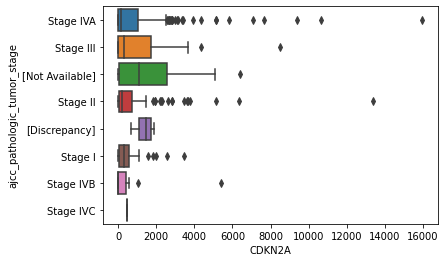

In [38]:
import pandas as pd
import seaborn as sns
from scipy import stats

# Explore association between biomarker and potential confounding factors
sns.boxplot(x='CDKN2A', y='ajcc_pathologic_tumor_stage', data=merged_data)
# This creates a boxplot to visualize the distribution of age for different biomarker groups



<Axes: xlabel='CDKN2A', ylabel='tumor_status'>

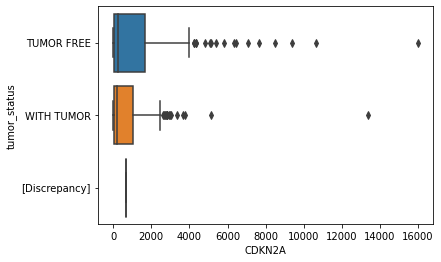

In [39]:
sns.boxplot(x='CDKN2A', y='tumor_status', data=merged_data)
# This creates a boxplot to visualize the distribution of tumor grade for different biomarker groups


<Axes: xlabel='OS', ylabel='tumor_status'>

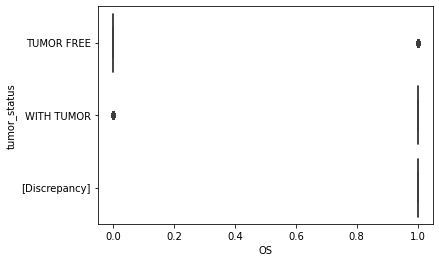

In [40]:
sns.boxplot(x='OS', y='tumor_status', data=merged_data)
# This creates a boxplot to visualize the distribution of tumor grade for different survival outcome groups




/tmp/ipykernel_1238/238460388.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data[['CDKN2A', 'ajcc_pathologic_tumor_stage', 'tumor_status', 'OS']].corr()


<Axes: >

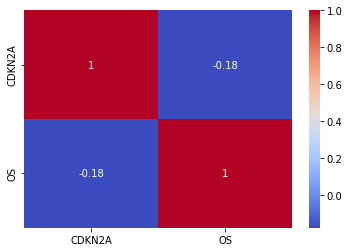

In [41]:
# Compute correlation coefficients between variables
correlation_matrix = merged_data[['CDKN2A', 'ajcc_pathologic_tumor_stage', 'tumor_status', 'OS']].corr()

# Display correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



In [42]:
# perform statistical tests such as t-tests, chi-square tests, or regression models to assess associations

# Example chi-square test for tumor grade and survival outcome
cross_tab = pd.crosstab(merged_data['tumor_status'], merged_data['OS'])
chi2_statistic, p_value, _, _ = stats.chi2_contingency(cross_tab)
print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

# Perform other statistical tests or models as needed based on your data and research objectives

Chi-square statistic: 183.79448847386286
P-value: 1.2289491846615103e-40


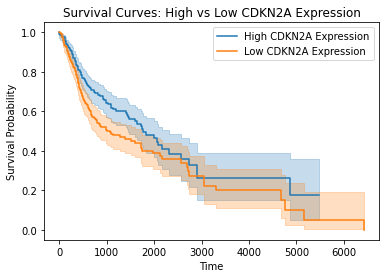

   test_statistic         p  -log2(p)
0        7.230541  0.007167  7.124342


In [56]:
median_value = merged_data['CDKN2A'].median()
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Assuming you have a DataFrame called data with columns 'TP53_expression' and 'Survival_time'

# Split the data into high and low TP53 expression groups
high_expression = merged_data[merged_data['CDKN2A'] >= median_value]
low_expression = merged_data[merged_data['CDKN2A'] < median_value]

# Initialize Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the survival curves for high and low expression groups
kmf.fit(high_expression['OS.time'], event_observed=high_expression['OS'], label='High CDKN2A Expression')
kmf.plot()

kmf.fit(low_expression['OS.time'], event_observed=low_expression['OS'], label='Low CDKN2A Expression')
kmf.plot()

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Curves: High vs Low CDKN2A Expression')
plt.legend()

# Show the plot
plt.show()
from lifelines.statistics import logrank_test
results = logrank_test(high_expression['OS.time'], low_expression['OS.time'],
                       high_expression['OS'], low_expression['OS'])
print(results.summary)


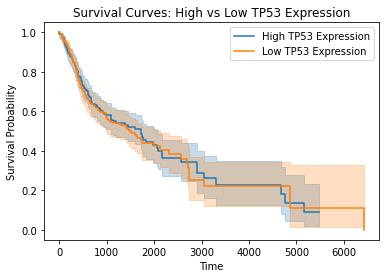

   test_statistic         p  -log2(p)
0        0.101746  0.749745  0.415528


In [57]:
median_value = merged_data['TP53'].median()
# Split the data into high and low TP53 expression groups
high_expression = merged_data[merged_data['TP53'] >= median_value]
low_expression = merged_data[merged_data['TP53'] < median_value]

# Initialize Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the survival curves for high and low expression groups
kmf.fit(high_expression['OS.time'], event_observed=high_expression['OS'], label='High TP53 Expression')
kmf.plot()

kmf.fit(low_expression['OS.time'], event_observed=low_expression['OS'], label='Low TP53 Expression')
kmf.plot()

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Curves: High vs Low TP53 Expression')
plt.legend()

# Show the plot
plt.show()
from lifelines.statistics import logrank_test
results = logrank_test(high_expression['OS.time'], low_expression['OS.time'],
                       high_expression['OS'], low_expression['OS'])
print(results.summary)


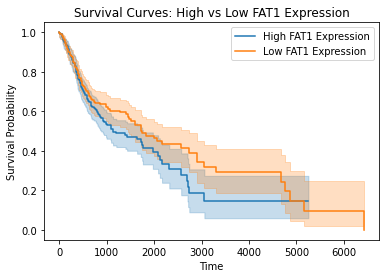

   test_statistic         p  -log2(p)
0        3.110628  0.077783  3.684402


In [58]:
median_value = merged_data['FAT1'].median()
# Split the data into high and low TP53 expression groups
high_expression = merged_data[merged_data['FAT1'] >= median_value]
low_expression = merged_data[merged_data['FAT1'] < median_value]

# Initialize Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the survival curves for high and low expression groups
kmf.fit(high_expression['OS.time'], event_observed=high_expression['OS'], label='High FAT1 Expression')
kmf.plot()

kmf.fit(low_expression['OS.time'], event_observed=low_expression['OS'], label='Low FAT1 Expression')
kmf.plot()

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Curves: High vs Low FAT1 Expression')
plt.legend()

# Show the plot
plt.show()
from lifelines.statistics import logrank_test
results = logrank_test(high_expression['OS.time'], low_expression['OS.time'],
                       high_expression['OS'], low_expression['OS'])
print(results.summary)


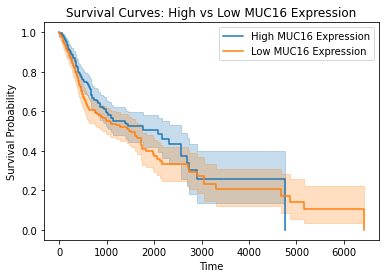

   test_statistic         p  -log2(p)
0        2.353793  0.124979  3.000247


In [59]:
median_value = merged_data['MUC16'].median()
# Split the data into high and low TP53 expression groups
high_expression = merged_data[merged_data['MUC16'] >= median_value]
low_expression = merged_data[merged_data['MUC16'] < median_value]

# Initialize Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the survival curves for high and low expression groups
kmf.fit(high_expression['OS.time'], event_observed=high_expression['OS'], label='High MUC16 Expression')
kmf.plot()

kmf.fit(low_expression['OS.time'], event_observed=low_expression['OS'], label='Low MUC16 Expression')
kmf.plot()

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Curves: High vs Low MUC16 Expression')
plt.legend()

# Show the plot
plt.show()
from lifelines.statistics import logrank_test
results = logrank_test(high_expression['OS.time'], low_expression['OS.time'],
                       high_expression['OS'], low_expression['OS'])
print(results.summary)